# Day 7: The Sum of Its Parts 

You find yourself standing on a snow-covered coastline; apparently, you landed a little off course. The region is too hilly to see the North Pole from here, but you do spot some Elves that seem to be trying to unpack something that washed ashore. It's quite cold out, so you decide to risk creating a paradox by asking them for directions.

> "Oh, are you the search party?" 

Somehow, you can understand whatever Elves from the year 1018 speak; you assume it's Ancient Nordic Elvish. Could the device on your wrist also be a translator? 

> "Those clothes don't look very warm; take this." 

They hand you a heavy coat.

> "We do need to find our way back to the North Pole, but we have higher priorities at the moment. You see, believe it or not, this box contains something that will solve all of Santa's transportation problems - at least, that's what it looks like from the pictures in the instructions." 

It doesn't seem like they can read whatever language it's in, but you can: 

> "Sleigh kit. Some assembly required."

> "'Sleigh'? What a wonderful name! You must help us assemble this 'sleigh' at once!" 

They start excitedly pulling more parts out of the box. The instructions specify a series of steps and requirements about which steps must be finished before others can begin (your puzzle input). Each step is designated by a single letter. For example, suppose you have the following instructions:

```
Step C must be finished before step A can begin.
Step C must be finished before step F can begin.
Step A must be finished before step B can begin.
Step A must be finished before step D can begin.
Step B must be finished before step E can begin.
Step D must be finished before step E can begin.
Step F must be finished before step E can begin.
```

Visually, these requirements look like this:

```
  -->A--->B--
 /    \      \
C      -->D----->E
 \           /
  ---->F-----
```
Your first goal is to determine the order in which the steps should be completed. If more than one step is ready, choose the step which is first alphabetically. In this example, the steps would be completed as follows:

+ Only C is available, and so it is done first.
+ Next, both A and F are available. A is first alphabetically, so it is done next.
+ Then, even though F was available earlier, steps B and D are now also available, and B is the first alphabetically of the three.
+ After that, only D and F are available. E is not available because only some of its prerequisites are complete. Therefore, D is completed next.
+ F is the only choice, so it is done next.
+ Finally, E is completed.

So, in this example, the correct order is CABDFE.

In what order should the steps in your instructions be completed?

In [5]:
import aocd
data = aocd.get_data(day=7, year=2018)

In [15]:
[0].split(" can")[0][-1]

'L'

In [145]:
import networkx as nx
import numpy as np

In [57]:
G = nx.DiGraph()

In [71]:
in_nodes = set()
out_nodes = set()
for line in data.split("\n"):
    in_nodes.add(line[5])
    out_nodes.add(line[36])
    G.add_edge(line[5],line[36])

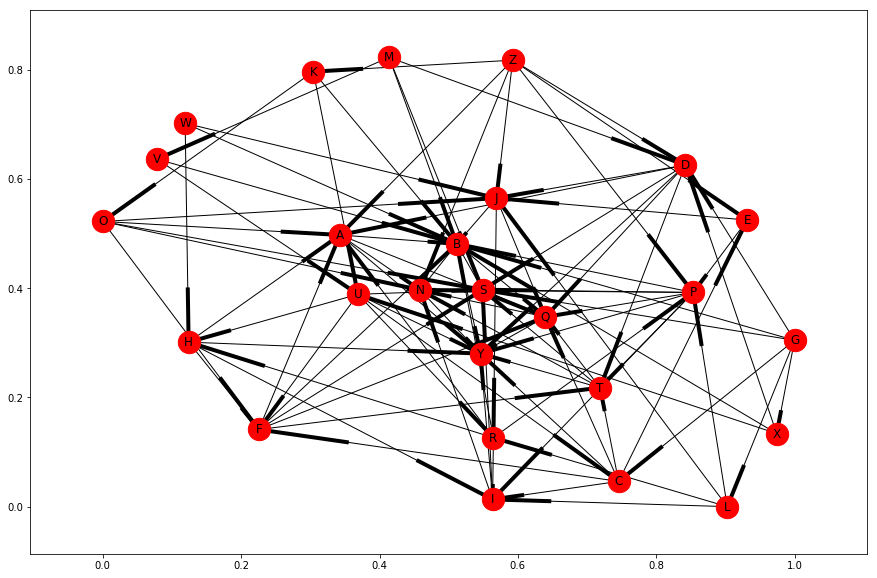

In [70]:
import matplotlib.pyplot as plt
# nx.draw_networkx_labels(G,pos=nx.spring_layout(G))
fig = plt.figure(figsize=(15,10))
ax = nx.draw_networkx(G,pos=nx.spring_layout(G), cmap=plt.get_cmap('jet'), node_size = 500)
plt.draw()
plt.show()

In [129]:
submit_txt = ""
nodes = in_nodes-out_nodes
seen = set()
while nodes:
    x = sorted(nodes)[0]
    seen.add(x)
    for q in sorted(G.successors(x)):
        if set(G.predecessors(q)).issubset(seen):
            nodes.add(q)
    submit_txt += x
    nodes.remove(x)

In [130]:
submit_txt

'GLMVWXZDKOUCEJRHFAPITSBQNY'

In [131]:
from aocd import submit
submit(submit_txt, level=1, day=7, year=2018)

That's the right answer!  You are one gold star closer to fixing the time stream. [Continue to Part Two]


<Response [200]>

# Part Two

As you're about to begin construction, four of the Elves offer to help. "The sun will set soon; it'll go faster if we work together." Now, you need to account for multiple people working on steps simultaneously. If multiple steps are available, workers should still begin them in alphabetical order.

Each step takes 60 seconds plus an amount corresponding to its letter: A=1, B=2, C=3, and so on. So, step A takes 60+1=61 seconds, while step Z takes 60+26=86 seconds. No time is required between steps.

To simplify things for the example, however, suppose you only have help from one Elf (a total of two workers) and that each step takes 60 fewer seconds (so that step A takes 1 second and step Z takes 26 seconds). Then, using the same instructions as above, this is how each second would be spent:

```
Second   Worker 1   Worker 2   Done
   0        C          .        
   1        C          .        
   2        C          .        
   3        A          F       C
   4        B          F       CA
   5        B          F       CA
   6        D          F       CAB
   7        D          F       CAB
   8        D          F       CAB
   9        D          .       CABF
  10        E          .       CABFD
  11        E          .       CABFD
  12        E          .       CABFD
  13        E          .       CABFD
  14        E          .       CABFD
  15        .          .       CABFDE
```
Each row represents one second of time. The Second column identifies how many seconds have passed as of the beginning of that second. Each worker column shows the step that worker is currently doing (or . if they are idle). The Done column shows completed steps.

Note that the order of the steps has changed; this is because steps now take time to finish and multiple workers can begin multiple steps simultaneously.

In this example, it would take 15 seconds for two workers to complete these steps.

With 5 workers and the 60+ second step durations described above, how long will it take to complete all of the steps?

In [284]:
workers_time = [0, 0, 0, 0]
workers_task = [0, 0, 0, 0]
nodes = in_nodes-out_nodes
nums = submit_txt
seen = set()
total_time = 0
print(nums)
while True:
    if 0 in workers_time and not (nums == ""):
        
        x = nums[0]
        print(G.predecessors(x))
        
        if G.predecessors(x) not in workers_task:
            workers_task[workers_time.index(0)] = x
            workers_time[workers_time.index(0)] = ord(x) - 3
            seen.add(x)
            nums = nums[1:]
        
    else:
        w = set(workers_time)
        w.discard(0)
        offset = min(w)
        
        workers_time[:] = [x - offset if not x == 0 else 0 for x in workers_time]
        
        total_time += offset
    
    if (sum(workers_time) == 0) and (nums == ""):
        print("{} seconds spent on deep IKEA meditation.".format(total_time))
        break

GLMVWXZDKOUCEJRHFAPITSBQNY
[]
['G']
[]
['M']
[]
['G']
[]
['Z', 'M', 'X', 'G']
['Z']
['K']
['X', 'K', 'V']
['G', 'U']
['Z', 'C']
['O', 'D', 'E', 'L', 'Z', 'W']
['J', 'L', 'U']
['W', 'U', 'R']
['H', 'O', 'U', 'C']
['R', 'F', 'H', 'D', 'O', 'Z']
['L', 'E', 'Z', 'R']
['H', 'R', 'L', 'C', 'P']
['F', 'C', 'D', 'P']
['M', 'U', 'G', 'T', 'I', 'P', 'O', 'F', 'D']
['V', 'S', 'F', 'G', 'W', 'M', 'K', 'P', 'R', 'X', 'A', 'J']
['D', 'C', 'J', 'P', 'T', 'S', 'F', 'A', 'B']
['Z', 'O', 'A', 'B', 'Q', 'S', 'P', 'I', 'T']
['I', 'Q', 'N', 'A', 'B', 'U', 'H', 'T', 'D', 'P', 'C']
524 seconds spent on deep IKEA meditation.


In [209]:
submit(total_time, level=2, day=7, year=2018)

That's not the right answer; your answer is too low.  If you're stuck, there are some general tips on the about page, or you can ask for hints on the subreddit.  Please wait one minute before trying again. (You guessed 524.) [Return to Day 7]


<Response [200]>

'GLMVWXZDKOUCEJRHFAPITSBQNY'